## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Library
import pandas as pd
import numpy as np

In [3]:
# Importing the DataSet
bike_sharing = pd.read_csv("day.csv")

In [4]:
# Reading head of Dataset and analysing the attributes
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Inspect the various aspects of the Dataset
bike_sharing.shape

(730, 16)

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# analyzing the statistical values of numerical variable
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Cleaning of Data

In [8]:
bike_sharing['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [9]:
# Dropping "instant" column since its index type column and wil not be useful in building the model.
bike_sharing.drop(["instant"], axis=1 , inplace=True)

In [10]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Dropping "dteday" column since other columns like "iyr" ,"mnth","weekday" all together providing same information.
bike_sharing.drop(["dteday"], axis=1 , inplace=True)

In [12]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Convert Season,Weathersit and Weekday columns to categorical types

In [13]:
#converting numeric value in season to categorical type
bike_sharing.season=bike_sharing.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [14]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
#converting numeric value in weekday to categorical type
bike_sharing.weekday=bike_sharing.weekday.map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})

In [16]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
#converting numeric value in Weathersit to categorical type
bike_sharing.weathersit=bike_sharing.weathersit.map({1:"clear_partly clouds",2:"mist_cloudy",3:"light snow_light rain_thunderstorm",4:"heavy rain_fog"})

In [18]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# converting numeric value in mnth to categorical type
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
# cnt is the target variable and addition of casual and registered is equal to cnt variable. So we can drop casual and registerated variable.
bike_sharing.drop(["casual","registered"], axis=1 , inplace=True)

In [21]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# checking the datatype of the variable again after mapping values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Data Visualisation by EDA on dataset

create box plot and barplot for category column w.r.t cnt variable    
create pairplot and heatmap for numeric variable

In [23]:
#importing libraries for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Segregation of columns to categorical and numerical type
cat_column = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_column = ["temp","atemp","hum","windspeed"]

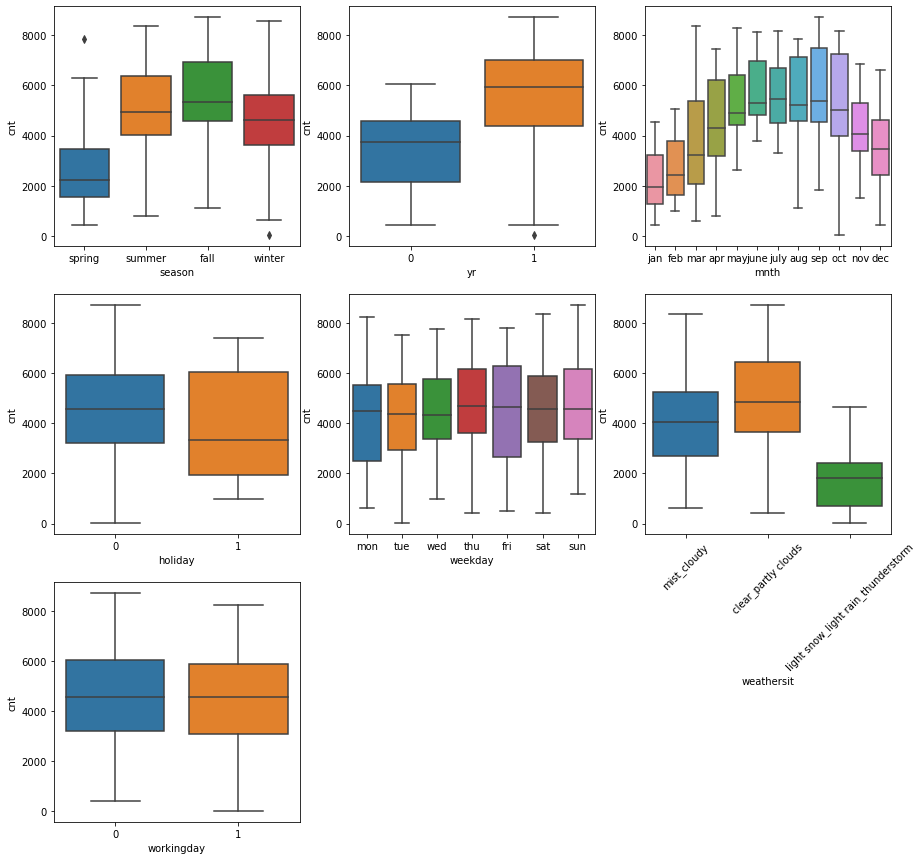

In [25]:
# # Analyzing Categorical Variables
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x ="season", y = "cnt", data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = "yr", y = "cnt", data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "cnt", data =bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = "weathersit", y = "cnt", data = bike_sharing)
plt.xticks(rotation='45')
plt.subplot(3,3,7)
sns.boxplot(x = "workingday", y ="cnt", data = bike_sharing)
plt.show()

#### Inferences:

1. Cnt is high in summer and fall season.
2. Cnt is more in 2019 as compared to 2018.
3. Cnt is more in month june to october.
4. More people prefer to rent bike on working days and during holiday people prefer to stay home.
5. Bike rentout most when the sky is clear or partly clouds.

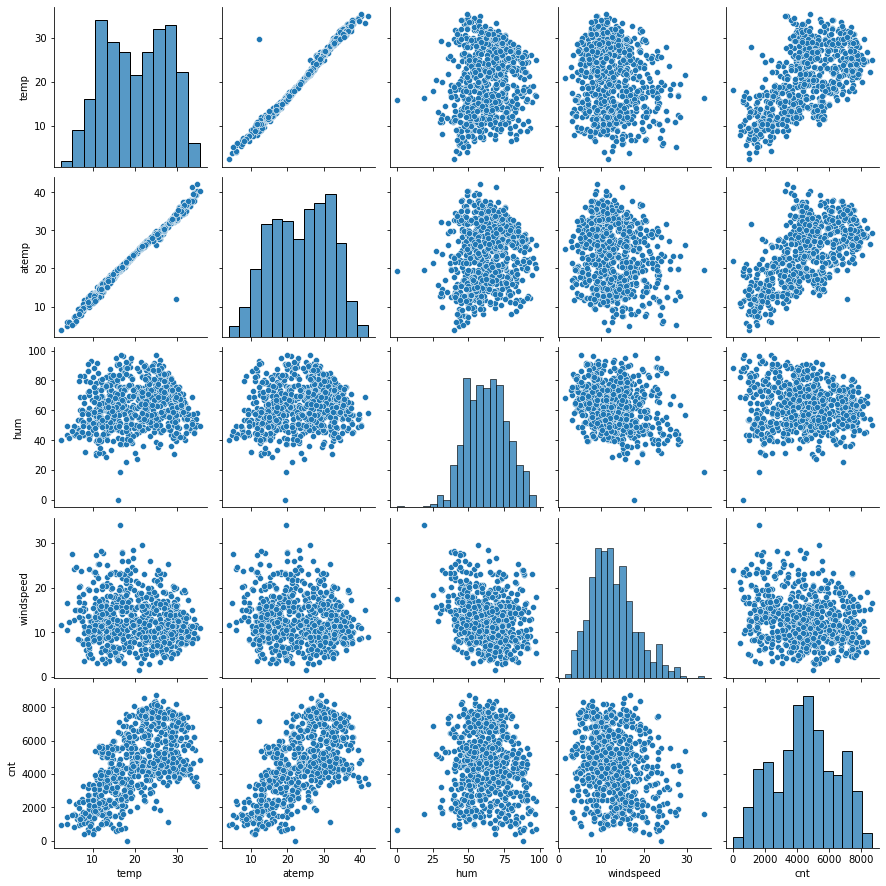

In [26]:
# Analyzing Numerical Variables
sns.pairplot(bike_sharing , vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

#### Inferences:   
1. temp and atemp highly corelated   
2. cnt shows linear relationship with temp variables

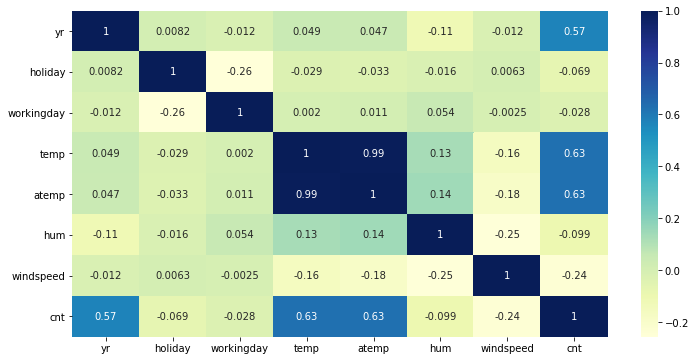

In [27]:
#plotiing through heatmap for checking corelation
plt.figure(figsize = (12, 6))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu") 
plt.show()

#### Inferences:
1. The coorelation between temp and atemp is very high 0.99.
2. The coreation between cnt with yr and temp also looks good.

## Step 3 : Preparing the Data

In [28]:
# Creating Dummy varaibles
seasons_1 = pd.get_dummies(bike_sharing.season,drop_first=True)
months_1 = pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekdays_1 = pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_1 = pd.get_dummies(bike_sharing.weathersit,drop_first=True)

In [29]:
seasons_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
months_1.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
weekdays_1.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [32]:
weathersit_1.head()

,light snow_light rain_thunderstorm,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
# concating all the dataframe to the bike_sharing dataset
bike_sharing = pd.concat([bike_sharing,seasons_1,months_1,weekdays_1,weathersit_1],axis=1)

In [34]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Dropping season, mnth, weekday, weathersit columns.
bike_sharing.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace = True)

In [36]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   atemp                               730 non-null    float64
 5   hum                                 730 non-null    float64
 6   windspeed                           730 non-null    float64
 7   cnt                                 730 non-null    int64  
 8   spring                              730 non-null    uint8  
 9   summer                              730 non-null    uint8  
 10  winter                              730 non-null    uint8  
 11  aug                                 730 non-n

## Step 4: Splitting the Data into Training and Testing Sets

In [38]:
# Splitting the Data using train split in 70% train and 30% test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the yr, holiday, workingday and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ,'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# creating the X and y variable
y_train = df_train.pop("cnt")
X_train = df_train

In [45]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

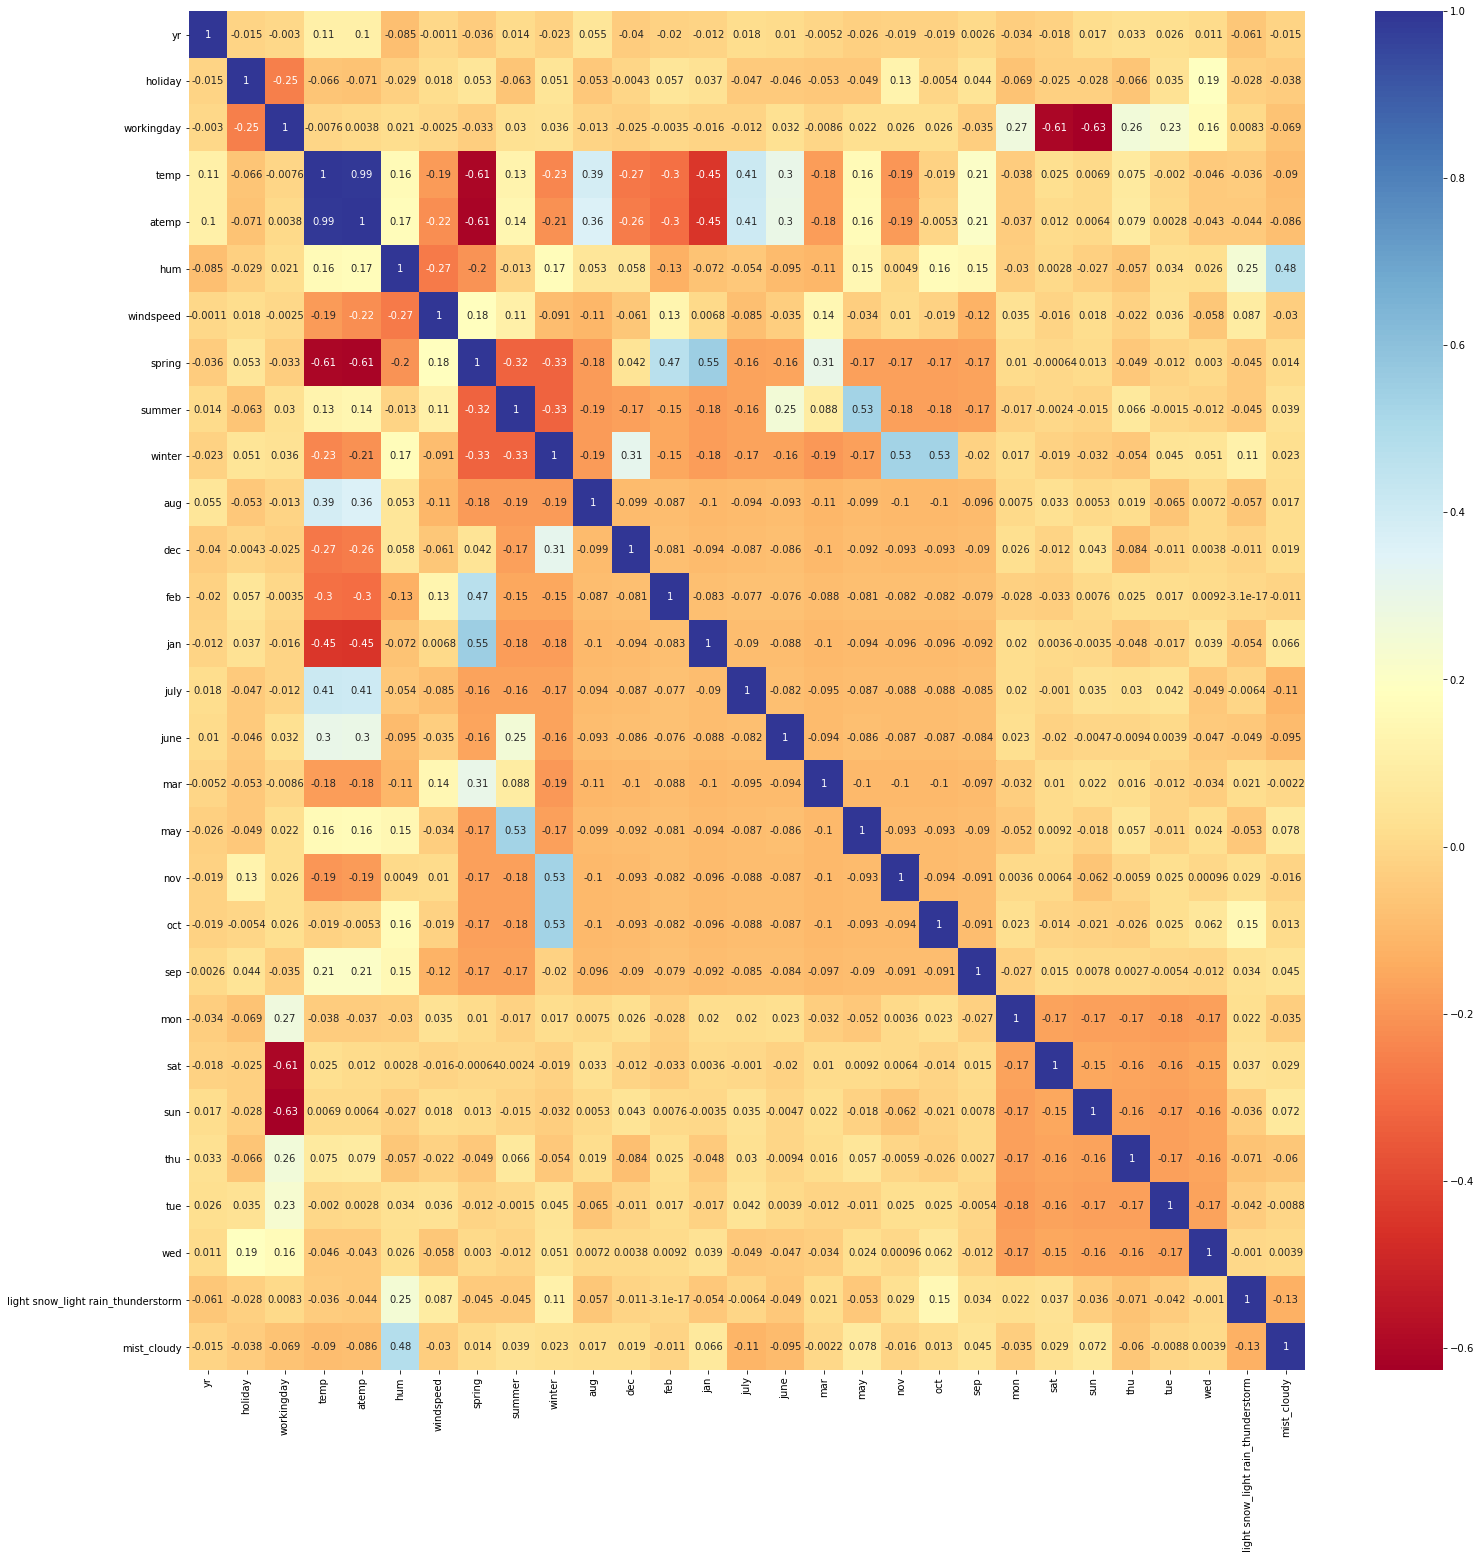

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlBu")
plt.show()

#### Inferences:

1. cnt shows good corelation with yr, temp, atemp.     
2. While there is a good negative corelation with spring.  
3. cnt also show good coreation with jan, feb and light snow_light rain_thunderstorm variable.

## Step 5: Building a linear model
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) for Building a Linear Regression model.

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('light snow_light rain_thunderstorm', True, 1),
 ('mist_cloudy', True, 1)]

In [51]:
# selecting the RFE columns
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep',
       'light snow_light rain_thunderstorm', 'mist_cloudy'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building the First Model

In [53]:
X_train_rfe = X_train[column]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)

In [55]:
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          3.34e-189
Time:                        13:52:43   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Calculate VIF

In [57]:
# Calculate the VIFs for the 1st model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,mist_cloudy,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


In [58]:
# Dropping humidity since showing very high VIF values (considering VIF less than 5 good VIF Value criteria)
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

### Building the Second Model

In [59]:
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.57e-186
Time:                        13:52:44   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [60]:
# Calculate the VIFs for the 2nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,july,1.59
13,mist_cloudy,1.56


In [61]:
# As summer shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['summer'], axis = 1)

### Building the third Model

In [62]:
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.08e-186
Time:                        13:52:44   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [63]:
# Calculate the VIFs for the 3rd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,mist_cloudy,1.53
6,dec,1.46
8,july,1.36


In [64]:
# As nov shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['nov'], axis = 1)

### Building the fourth Model

In [65]:
X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          2.02e-186
Time:                        13:52:45   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [66]:
# Calculate the VIFs for the 4th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,mist_cloudy,1.53
8,july,1.36
6,dec,1.29
9,sep,1.20


In [67]:
# As dec shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['dec'], axis = 1)

### Building the fifth Model

In [68]:
X_train_lm_5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.13e-186
Time:                        13:52:45   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
# Calculate the VIFs for the 5th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,jan,1.60
10,mist_cloudy,1.53
5,winter,1.40
7,july,1.36
8,sep,1.20
9,light snow_light rain_thunderstorm,1.08


In [70]:
# As Jan shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

 ### Building the sixth Model

In [71]:
X_train_lm_6 = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.16e-186
Time:                        13:52:46   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [72]:
# Calculate the VIFs for the 5th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,mist_cloudy,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,light snow_light rain_thunderstorm,1.08
1,holiday,1.04


We can cosider the model lm_6, as it is having very low multicolinearity between the predictors and the p-values for all the predictors is significant.
F-Statistics value of 248.7 (which is greater than 1) and the Prob (F-statistic) of 1.16e-186 i.e almost equals to zero, states that the overall model is significant

## Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
# calculating the prediction value of y for the lr_6 model
y_train_pred = lm_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

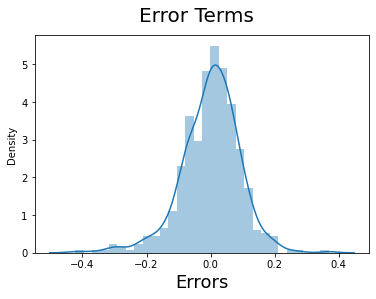

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Above graph clearly state that Errors are normally distributed.

### Homoscedasticity of Model

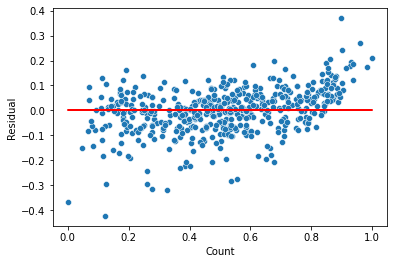

In [75]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

 No visible pattern observed.Model is distributed over the line.

### Multicolinearity of Model

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,mist_cloudy,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,light snow_light rain_thunderstorm,1.08
1,holiday,1.04


All the values of VIF are less than 5. So the model is having no multicolinearity.

### Linearity of Model

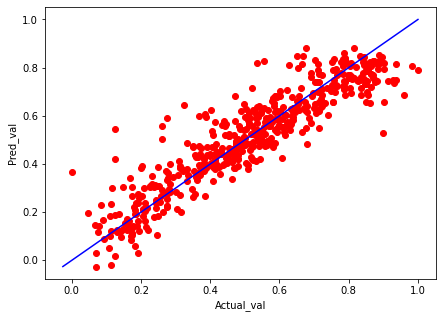

In [77]:
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, c="red")
plt.xlabel("Actual_val")
plt.ylabel("Pred_val")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')

## Step 7 : Making Prediction


#### Applying the scaling on the test sets

In [78]:
num_vars = ["temp","atemp", "hum", "windspeed" ,"cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [79]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [80]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [81]:
# creating the X and y variable
y_test = df_test.pop("cnt")
X_test = df_test

In [82]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

In [86]:
# checking the r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) 

In [87]:
r2

0.7953777856921885

### Step 8 : Model Evaluation

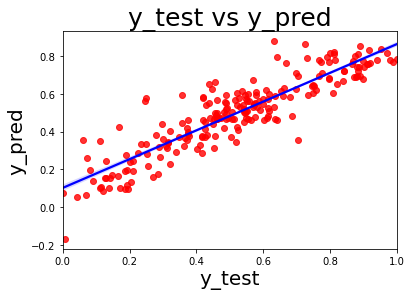

In [98]:
# Plotting y_test and y_pred to understand the spread.
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()


As the graph between test data and predicted data is linear it means model is giving the accurate prediction.

In [99]:
lm_6.params

const                                 0.251899
yr                                    0.234092
holiday                              -0.098556
temp                                  0.451455
windspeed                            -0.139817
spring                               -0.110795
winter                                0.047278
july                                 -0.072719
sep                                   0.057705
light snow_light rain_thunderstorm   -0.286408
mist_cloudy                          -0.081133
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.251899 +   0.234092 \times  yr  -0.098556  \times  holiday +   0.451455 \times temp -0.139817 \times windspeed -0.110795 \times spring + 0.047278  \times  winter -0.072719  \times july  +  0.057705 \times sep -0.286408 \times light snow_light rain_thunderstorm  - 0.081133 \times mist_cloudy  $   

 ## R-square comparision:
1. R-squared score of train dataset is 0.833
2. R-squared score of test dataset is 0.795


## Final Summary:

1. All the positive coefficients like yr,temp,winter, september indicate that an increase in these values will lead to an 
   increase in the value of cnt.
2. All the negative coefficients such as holiday, windspeed, spring, july, light snow_light rain_thunderstorm,mist_cloud   
   indicate that an increase in these values will lead to an decrease in the value of cnt.
3. Temp is the most significant among the all variables with the largest coefficient.
4. Month September has got good impact on number of rides.
5. Month July has got negative impact  on number of rides.
6. Holidays has got negative impact on number of rides.


## Predictions:

1. Company should focus on business expansion during month of September.
2. Based on previous data it is expected to have a rise in number of users when the situation will come to normal, compared to 
   2019.
3. During a clear wheather the company can raise the cost by some percent to get more benfit since it has positive impact on 
   business
4. In winter season the business could be expanded.
